In [84]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from collections import Counter

DATABASE_DIR = './database'
ALPHA_DATABASE_DIR = './alpha-database'

# PDB

In [85]:
def getChainIds(lines):
  chainIds = []
  for l in lines:
    if l[21] not in chainIds:
      chainIds.append(l[21])

  return chainIds

def getProteinChain(chainId, lines):
  atoms = {}
  for l in lines:
    if l[21] == chainId and l[13:15] == 'CA':
      resSeq = int(l[22:26])
      x = float(l[30:38])
      y = float(l[39:46])
      z = float(l[47:54])
      atoms[resSeq] = {
          'name': l[17:20].strip(),
          'position': (x, y, z),
      }
  return atoms

def getRNAChain(chainId, lines):
  atoms = {}
  nucleotides = ['A', 'U', 'C', 'G']
  for l in lines:
    if l[21] == chainId and l[18:20].strip() in nucleotides:
      resSeq = int(l[22:26])
      x = float(l[30:38])
      y = float(l[39:46])
      z = float(l[47:54])
      atoms[resSeq] = {
          'name': l[17:20].strip(),
          'position': (x, y, z),
      }
  return atoms

def getProteinAminoacids(chainId, lines):
  atoms = {}
  for l in lines:
    if l[21] == chainId and l[13:15] == 'CA':
      resSeq = int(l[22:26])
      atoms[resSeq] = l[17:20].strip()
  return atoms

def getRNANucleotides(chainId, lines):
  atoms = {}
  nucleotides = ['A', 'U', 'C', 'G']
  for l in lines:
    if l[21] == chainId and l[18:20].strip() in nucleotides:
      resSeq = int(l[22:26])
      atoms[resSeq] = l[18:20].strip()
  return atoms

In [86]:
def readFiles():
  proteinChains = {}
  RNAChains = {}
  for filename in os.listdir(DATABASE_DIR):
    with open(f'{DATABASE_DIR}/{filename}', 'r') as fr:
      lines = fr.readlines()
      structCode = filename[:4]
      chainIDs = getChainIds(lines)
      if len(chainIDs) == 2:
        for chainID in chainIDs:
          proteinChain = getProteinChain(chainID, lines)
          if proteinChain != {}:
            proteinChains[structCode] = proteinChain
          RNAChain = getRNAChain(chainID, lines)
          if RNAChain != {}:
            RNAChains[structCode] = RNAChain

  return proteinChains, RNAChains

proteinChains, RNAChains = readFiles()

In [87]:
def getAtoms():
  proteinAminoacids = {}
  RNANucleotides = {}
  for filename in os.listdir(DATABASE_DIR):
    with open(f'{DATABASE_DIR}/{filename}', 'r') as fr:
      lines = fr.readlines()
      structCode = filename[:4]
      chainIDs = getChainIds(lines)
      if len(chainIDs) == 2:
        for chainID in chainIDs:
          proteinAminoacid = getProteinAminoacids(chainID, lines)
          if proteinAminoacid != {}:
            proteinAminoacids[structCode] = proteinAminoacid
          RNANucleotide = getRNANucleotides(chainID, lines)
          if RNANucleotide != {}:
            RNANucleotides[structCode] = RNANucleotide

  return proteinAminoacids, RNANucleotides

proteinAminoacids, RNANucleotides = getAtoms()

In [88]:
protein_aminoacids = {}

for key, v in proteinAminoacids.items():
  res = Counter(v.values())
  protein_aminoacids[key] = res

In [89]:
plot_protein_data = []

for key, values in proteinChains.items():
  plot_protein_data.append(
      [
          key,
          len(values)
      ]
  )


protein_df = pd.DataFrame (
    plot_protein_data,
    columns = [
        'Structure',
        'Number of amino acids'
    ]
)

protein_df

,Structure,Number of amino acids
0,7kjt,145
1,5o3j,80
2,2ad9,98
3,4udv,153
4,1emi,136
...,...,...
199,6r9o,594
200,6hpj,84
201,7yn9,1514
202,2adb,127


In [90]:
plot_protein_aminoacides_data = []

for key, values in proteinChains.items():
  plot_protein_aminoacides_data.append(
      [
          key,
          protein_aminoacids[key]['ALA'],
          protein_aminoacids[key]['ARG'],
          protein_aminoacids[key]['ASN'],
          protein_aminoacids[key]['ASP'],
          protein_aminoacids[key]['CYS'],
          protein_aminoacids[key]['GLN'],
          protein_aminoacids[key]['GLU'],
          protein_aminoacids[key]['GLY'],
          protein_aminoacids[key]['HIS'],
          protein_aminoacids[key]['LEU'],
          protein_aminoacids[key]['ILE'],
          protein_aminoacids[key]['LYS'],
          protein_aminoacids[key]['MET'],
          protein_aminoacids[key]['PHE'],
          protein_aminoacids[key]['PRO'],
          protein_aminoacids[key]['SER'],
          protein_aminoacids[key]['THR'],
          protein_aminoacids[key]['TRP'],
          protein_aminoacids[key]['TYR'],
          protein_aminoacids[key]['VAL'],
      ]
  )


protein_aminoacides_df = pd.DataFrame (
    plot_protein_aminoacides_data,
    columns = [
        'Structure',
        'ALA',
        'ARG',
        'ASN',
        'ASP',
        'CYS',
        'GLN',
        'GLU',
        'GLY',
        'HIS',
        'LEU',
        'ILE',
        'LYS',
        'MET',
        'PHE',
        'PRO',
        'SER',
        'THR',
        'TRP',
        'TYR',
        'VAL',
    ]
)

protein_aminoacides_df

,Structure,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,HIS,...,ILE,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
0,7kjt,10,10,8,7,2,4,15,10,3,...,23,13,3,6,2,3,3,1,1,9
1,5o3j,8,4,4,5,0,4,3,10,2,...,5,5,2,7,2,4,4,3,1,5
2,2ad9,5,5,7,3,0,4,6,7,2,...,7,6,3,3,6,8,7,0,3,8
3,4udv,13,11,10,8,1,9,7,5,0,...,9,2,0,8,7,15,15,3,4,14
4,1emi,6,20,1,7,1,2,10,13,2,...,12,9,1,2,9,5,6,1,6,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,6r9o,23,26,43,30,11,17,49,23,14,...,43,40,9,28,21,41,39,4,35,33
200,6hpj,5,10,4,12,1,0,5,9,0,...,6,3,0,5,7,2,1,0,5,6
201,7yn9,84,107,69,108,32,37,121,106,33,...,68,146,24,80,83,76,73,29,42,79
202,2adb,11,4,8,10,2,9,1,6,2,...,7,7,3,7,6,10,8,0,5,7


In [91]:
columns = [
    'ALA',
    'ARG',
    'ASN',
    'ASP',
    'CYS',
    'GLN',
    'GLU',
    'GLY',
    'HIS',
    'LEU',
    'ILE',
    'LYS',
    'MET',
    'PHE',
    'PRO',
    'SER',
    'THR',
    'TRP',
    'TYR',
    'VAL',
]

tot_aminoacids = []
for column in columns:
  tot = protein_aminoacides_df[column].sum()
  tot_aminoacids.append(tot)

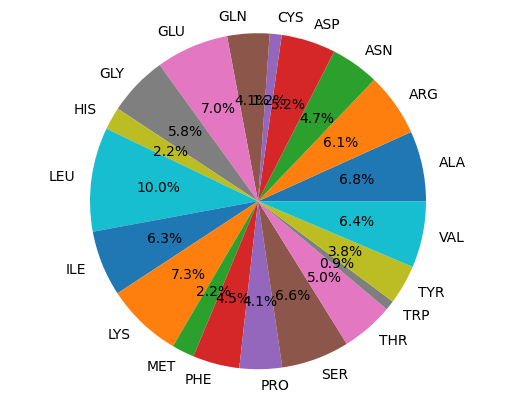

In [92]:
fig1, ax1 = plt.subplots()
ax1.pie(tot_aminoacids,
        labels=columns,
        autopct='%1.1f%%')

ax1.axis('equal')
# plt.show()
plt.savefig('imgs/general/aminoacid_frequency.png', bbox_inches='tight')

In [93]:
rna_nucleotides = {}

for key, v in RNANucleotides.items():
  res = Counter(v.values())
  rna_nucleotides[key] = res

In [94]:
plot_rna_data = []

for key, values in RNAChains.items():
  plot_rna_data.append(
      [
          key,
          len(values)
      ]
  )

rna_df = pd.DataFrame (
    plot_rna_data,
    columns = [
        'Structure',
        'Number of nucleotides'
    ]
)

rna_df

,Structure,Number of nucleotides
0,7kjt,70
1,5o3j,3
2,2ad9,6
3,4udv,3
4,1emi,161
...,...,...
199,6r9o,4
200,6hpj,6
201,7yn9,38
202,2adb,6


In [95]:
plot_rna_nucleotides_data = []

for key, values in RNAChains.items():
  plot_rna_nucleotides_data.append(
      [
          key,
          rna_nucleotides[key]['A'],
          rna_nucleotides[key]['U'],
          rna_nucleotides[key]['C'],
          rna_nucleotides[key]['G'],
      ]
  )

rna_nucleotides_df = pd.DataFrame (
    plot_rna_nucleotides_data,
    columns = [
        'Structure',
        'A',
        'U',
        'C',
        'G',
    ]
)

rna_nucleotides_df

,Structure,A,U,C,G
0,7kjt,12,12,23,23
1,5o3j,0,2,1,0
2,2ad9,0,3,3,0
3,4udv,2,0,0,1
4,1emi,33,39,39,50
...,...,...,...,...,...
199,6r9o,2,0,0,2
200,6hpj,5,0,1,0
201,7yn9,13,9,8,8
202,2adb,0,3,3,0


In [96]:
columns = [
    'A',
    'U',
    'C',
    'G',
]

tot_nucleotides = []
for column in columns:
  tot = rna_nucleotides_df[column].sum()
  tot_nucleotides.append(tot)

In [97]:
tot_nucleotides

[1902, 1769, 1828, 2096]

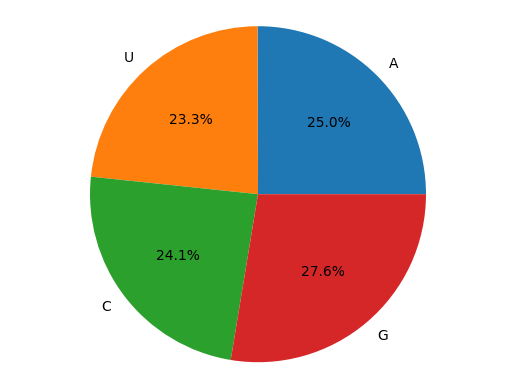

In [98]:
fig1, ax1 = plt.subplots()
ax1.pie(tot_nucleotides,
        labels=columns,
        autopct='%1.1f%%')

ax1.axis('equal')
# plt.show()
plt.savefig('imgs/general/nucleotides_frequency.png', bbox_inches='tight')

In [99]:
df = pd.merge(protein_df, rna_df, on = "Structure")

df

,Structure,Number of amino acids,Number of nucleotides
0,7kjt,145,70
1,5o3j,80,3
2,2ad9,98,6
3,4udv,153,3
4,1emi,136,161
...,...,...,...
199,6r9o,594,4
200,6hpj,84,6
201,7yn9,1514,38
202,2adb,127,6


ERROR! Session/line number was not unique in database. History logging moved to new session 10


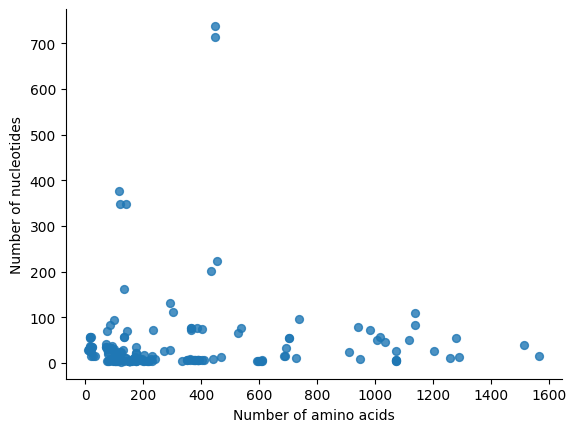

In [100]:
df.plot(kind='scatter', x='Number of amino acids', y='Number of nucleotides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

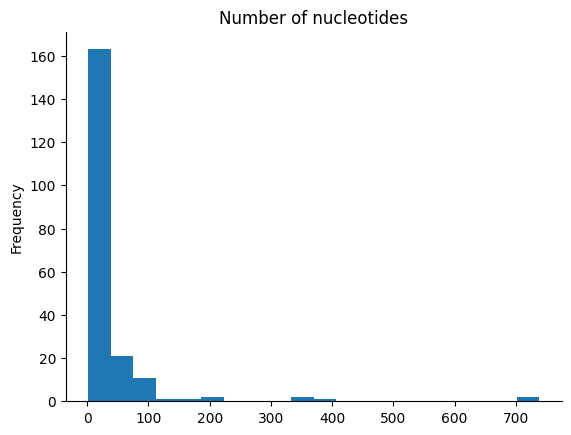

In [101]:
df['Number of nucleotides'].plot(kind='hist', bins=20, title='Number of nucleotides')
plt.gca().spines[['top', 'right',]].set_visible(False)

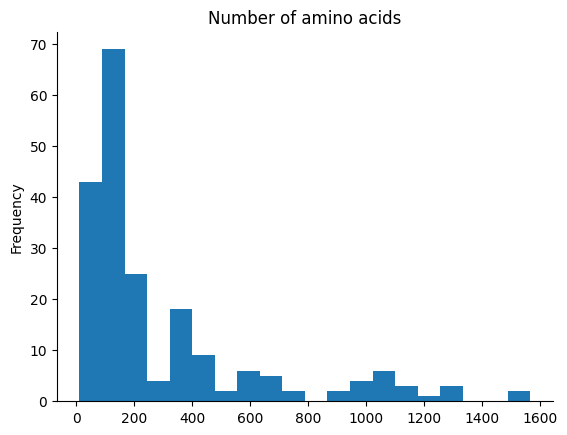

In [102]:
df['Number of amino acids'].plot(kind='hist', bins=20, title='Number of amino acids')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [103]:
plot_rna_data = []

for key, values in RNAChains.items():
  if len(values) < 150:
    plot_rna_data.append([key, len(values)])


rna_df = pd.DataFrame(plot_rna_data, columns=['Structure', 'Number of nucleotides'])
rna_df

,Structure,Number of nucleotides
0,7kjt,70
1,5o3j,3
2,2ad9,6
3,4udv,3
4,7x34,94
...,...,...
191,6r9o,4
192,6hpj,6
193,7yn9,38
194,2adb,6


In [104]:
plot_protein_data = []

for key, values in proteinChains.items():
  if len(values) < 800:
    plot_protein_data.append([key, len(values)])

protein_df = pd.DataFrame(plot_protein_data, columns=['Structure', 'Number of amino acids'])
print(protein_df)

    Structure  Number of amino acids
0        7kjt                    145
1        5o3j                     80
2        2ad9                     98
3        4udv                    153
4        1emi                    136
..        ...                    ...
178      1etf                     23
179      6r9o                    594
180      6hpj                     84
181      2adb                    127
182      2cjk                    167

[183 rows x 2 columns]


In [105]:
df = pd.merge(protein_df, rna_df, on = "Structure")

df

,Structure,Number of amino acids,Number of nucleotides
0,7kjt,145,70
1,5o3j,80,3
2,2ad9,98,6
3,4udv,153,3
4,7x34,100,94
...,...,...,...
170,1etf,23,34
171,6r9o,594,4
172,6hpj,84,6
173,2adb,127,6


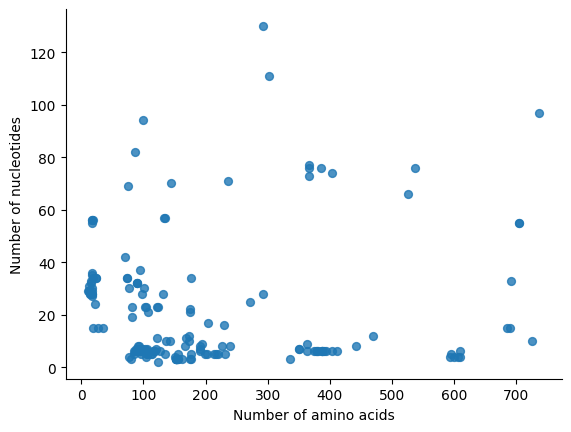

In [106]:
df.plot(kind='scatter', x='Number of amino acids', y='Number of nucleotides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('imgs/general/distribution.png', bbox_inches='tight')

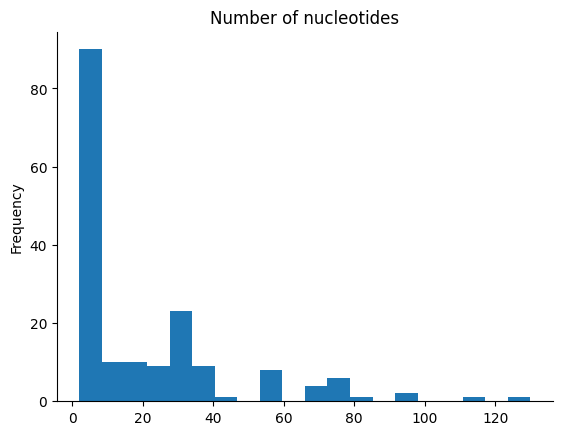

In [107]:
df['Number of nucleotides'].plot(kind='hist', bins=20, title='Number of nucleotides')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('imgs/general/nucleotide_frequency_hist.png', bbox_inches='tight')

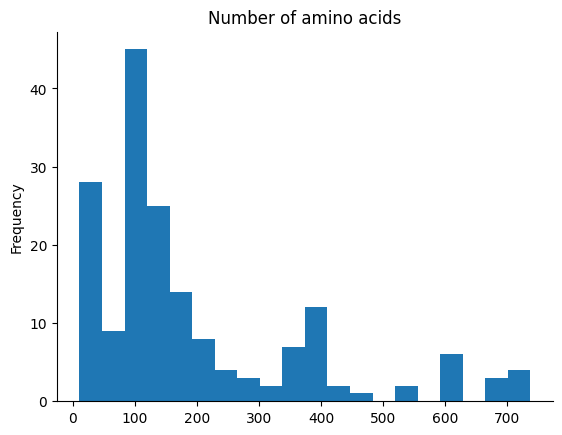

In [108]:
df['Number of amino acids'].plot(kind='hist', bins=20, title='Number of amino acids')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('imgs/general/aminoacid_frequency_hist.png', bbox_inches='tight')

In [109]:
def dist(a1, a2):
  p1 = a1['position']
  p2 = a2['position']
  x = 0
  y = 1
  z = 2
  return math.sqrt((p1[x] - p2[x])**2 + (p1[y] - p2[y])**2 + (p1[z] - p2[z])**2)

def distMap(proteinAtoms, RNAAtoms):
  m = []
  i = 0
  for a1 in proteinAtoms:
    for a2 in RNAAtoms:
      distance = dist(proteinAtoms[a1], RNAAtoms[a2])

      if distance < 5:
        m.append({
            'from': proteinAtoms[a1]['name'],
            'to': RNAAtoms[a2]['name'],
            'dist': distance
        })
        i+=1
  return m

In [110]:
def getChain(chainId, lines):
  atoms = {}
  nucleotides = ['A', 'U', 'C', 'G']
  for l in lines:
    if l[21] == chainId and l[18:20].strip() in nucleotides:
      resSeq = int(l[22:26])
      x = float(l[30:38])
      y = float(l[39:46])
      z = float(l[47:54])
      atoms[resSeq] = {
          'name': l[18:20].strip(),
          'position': (x, y, z),
      }
    elif l[21] == chainId and l[13:15] == 'CA':
      resSeq = int(l[22:26])
      x = float(l[30:38])
      y = float(l[39:46])
      z = float(l[47:54])
      atoms[resSeq] = {
          'name': l[17:20].strip(),
          'position': (x, y, z),
      }
  return atoms

def getChains():
  chains = {}
  for filename in os.listdir(DATABASE_DIR):
    with open(f'{DATABASE_DIR}/{filename}', 'r') as fr:
      lines = fr.readlines()
      structCode = filename[:4]
      chainIDs = getChainIds(lines)
      if len(chainIDs) == 2:
        for chainID in chainIDs:
          chain = getChain(chainID, lines)
          if chain != {}:
            chains[structCode] = chain

  return chains

chains = getChains()

In [111]:
# fig = px.imshow(distMap(chains['8d49']))
# fig.show()

In [112]:
interactionsPDB = {}
interactions = []

for key, values in proteinChains.items():
  d = distMap(proteinChains[key], RNAChains[key])
  interactionsPDB[key] = d

  for val in d:
    interactions.append(val)

In [113]:
aminoacids = [
    'ALA',
    'ARG',
    'ASN',
    'ASP',
    'CYS',
    'GLN',
    'GLU',
    'GLY',
    'HIS',
    'LEU',
    'ILE',
    'LYS',
    'MET',
    'PHE',
    'PRO',
    'SER',
    'THR',
    'TRP',
    'TYR',
    'VAL',
]

nucleotides = [
    'A',
    'U',
    'C',
    'G',
]

def getList(aminoacid):
  resp = []
  for i in interactions:
    if i['from'] == aminoacid:
      resp.append(i['to'])

  return resp

interaction_stats = {}

for val in interactions:
  interaction_stats[val['from']] = getList(val['from'])

In [114]:
def getAminoacidFreq(interactions):
  freq = {}
  for key, stat in interactions.items():
    freq[key] = {
      nucleotides[0]: stat.count(nucleotides[0]),
      nucleotides[1]: stat.count(nucleotides[1]),
      nucleotides[2]: stat.count(nucleotides[2]),
      nucleotides[3]: stat.count(nucleotides[3])
    }

  return freq

frequency = getAminoacidFreq(interaction_stats)

In [115]:
def mountFrequencyDf(frequency):
  plot_frequency_data = []
    
  for key, values in frequency.items():
    plot_frequency_data.append(
      [
          key,
          frequency[key]['A'],
          frequency[key]['U'],
          frequency[key]['C'],
          frequency[key]['G'],
      ]
    )

  return pd.DataFrame (
    plot_frequency_data,
    columns = [
        'Aminoacid',
        'A',
        'U',
        'C',
        'G',
    ]
  )

frequency_df = mountFrequencyDf(frequency)
frequency_df

,Aminoacid,A,U,C,G
0,ALA,26,6,8,8
1,LYS,13,9,13,12
2,GLY,25,30,27,25
3,ASP,4,3,2,8
4,PRO,12,6,9,5
5,VAL,17,6,1,4
6,SER,18,1,3,17
7,ASN,14,8,4,6
8,PHE,10,6,0,3
9,GLU,6,2,0,3


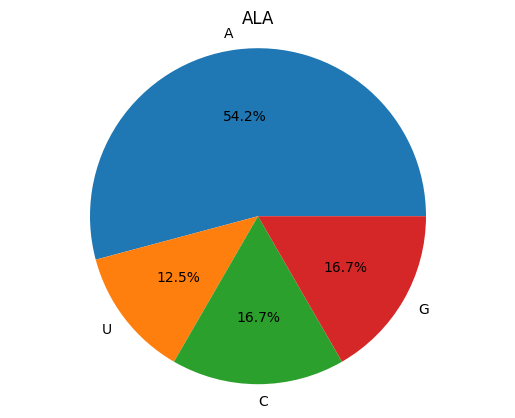

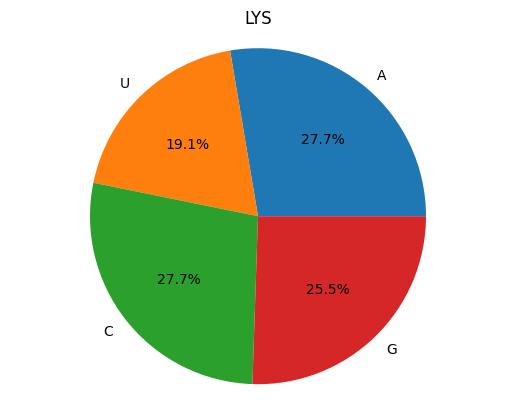

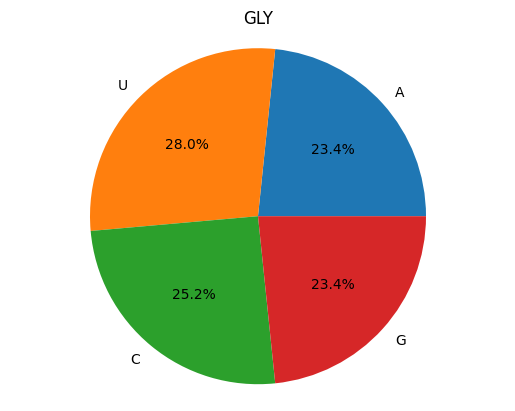

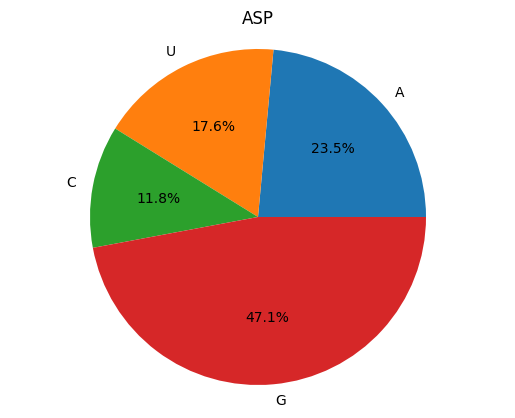

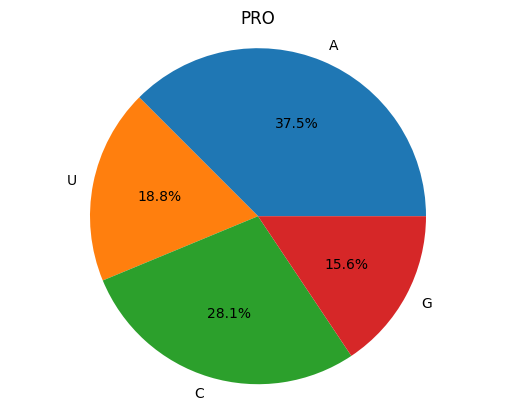

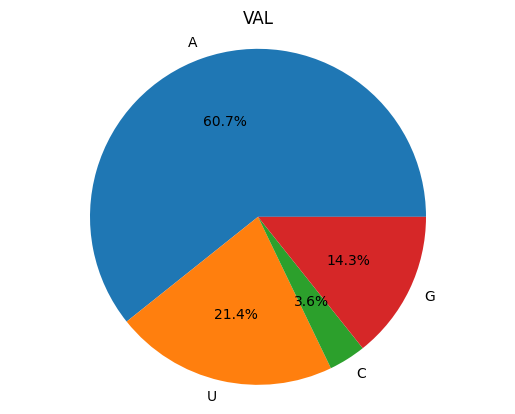

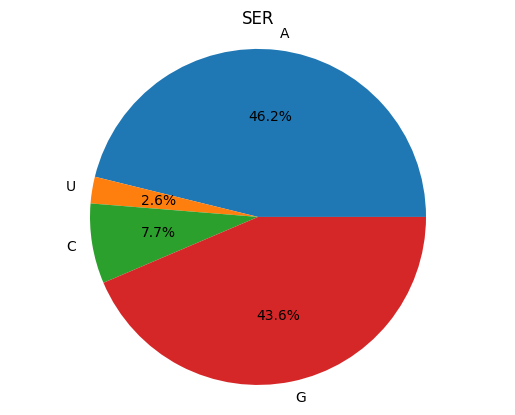

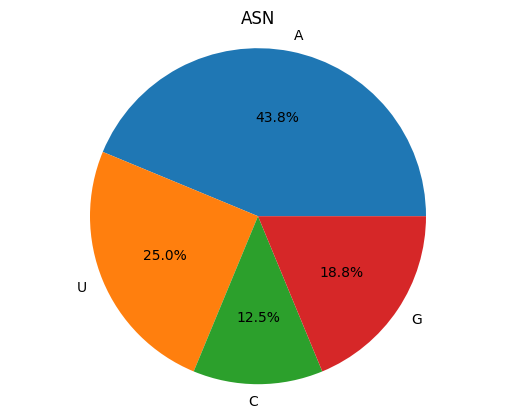

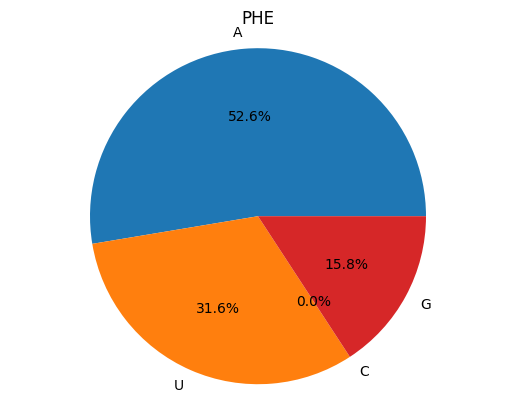

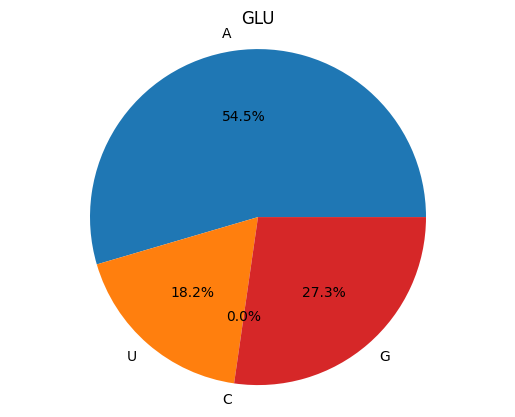

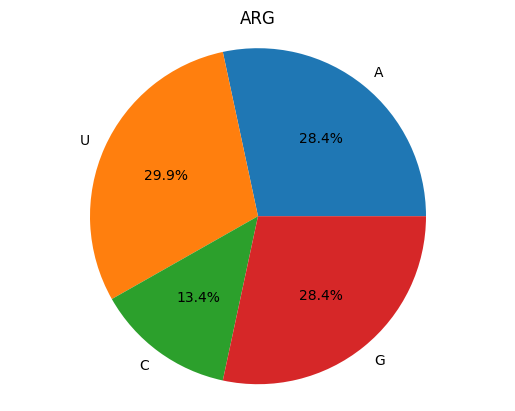

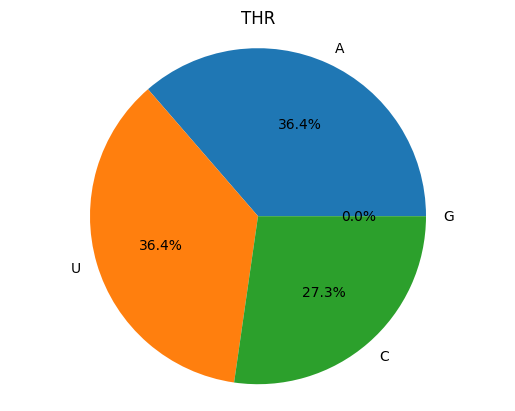

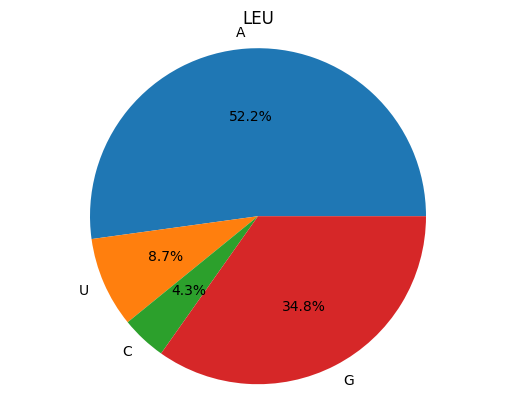

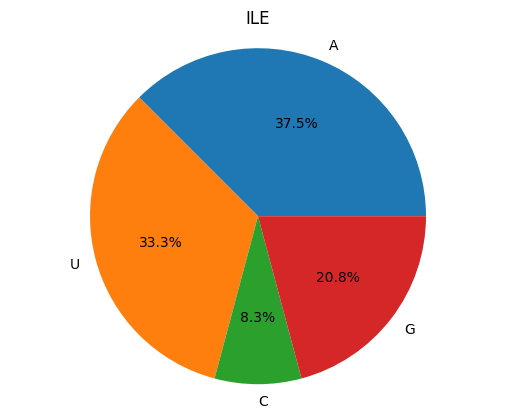

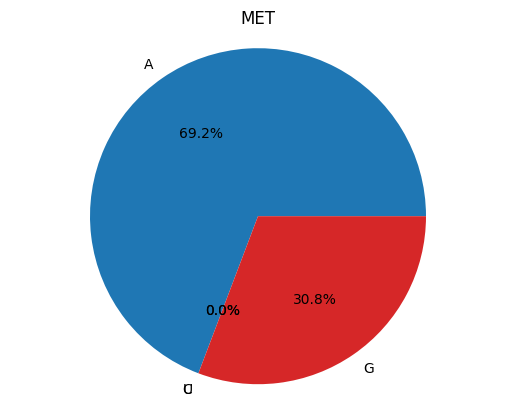

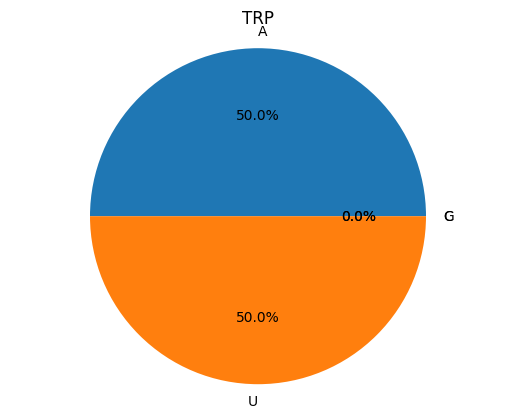

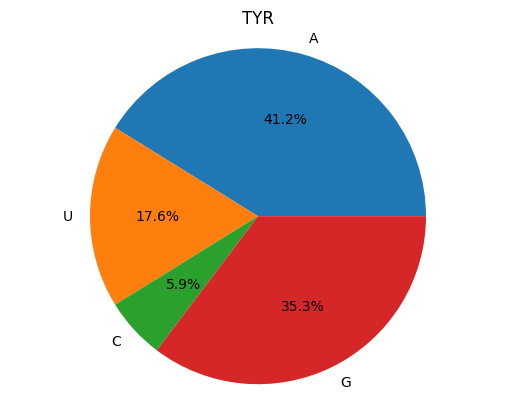

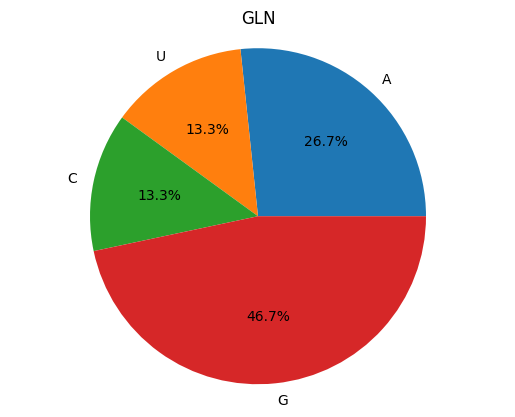

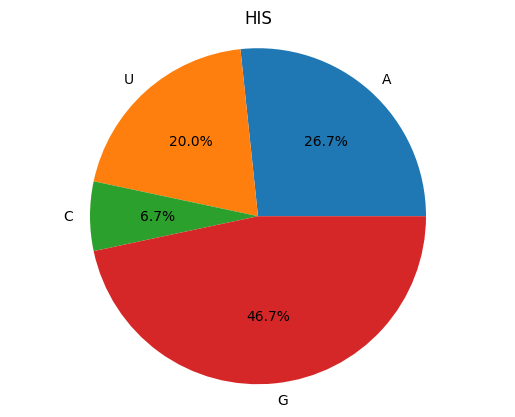

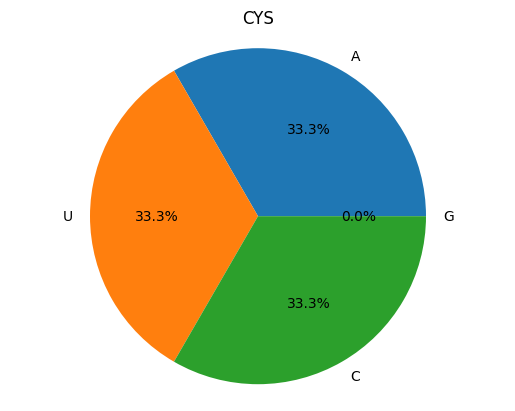

In [116]:
def plotNucleotideFrequency(frequency_df, img_dir = 'db-nucleotides-frequency'):
  for indices, row in frequency_df.iterrows():
    fig1, ax1 = plt.subplots()
    plt.title(row['Aminoacid'])
    ax1.pie([
            row[nucleotides[0]],
            row[nucleotides[1]],
            row[nucleotides[2]],
            row[nucleotides[3]]
          ],
          labels=nucleotides,
          autopct='%1.1f%%')

    ax1.axis('equal')
    # plt.show()
      
    plt.savefig(f"imgs/general/{img_dir}/{row['Aminoacid']}.png", bbox_inches='tight')

plotNucleotideFrequency(frequency_df)

In [117]:
def getListNumclAmin(nucleotide):
  resp = []
  for i in interactions:
    if i['to'] == nucleotide:
      resp.append(i['from'])

  return resp

interaction_stats = {}

for val in interactions:
  interaction_stats[val['to']] = getListNumclAmin(val['to'])

In [118]:
def getNucleotideFreq(interactions):
  frequencyNumclAmin = {}
  for key, stat in interaction_stats.items():
    frequencyNumclAmin[key] = {
      aminoacids[0]: stat.count(aminoacids[0]),
      aminoacids[1]: stat.count(aminoacids[1]),
      aminoacids[2]: stat.count(aminoacids[2]),
      aminoacids[3]: stat.count(aminoacids[3]),
      aminoacids[4]: stat.count(aminoacids[4]),
      aminoacids[5]: stat.count(aminoacids[5]),
      aminoacids[6]: stat.count(aminoacids[6]),
      aminoacids[7]: stat.count(aminoacids[7]),
      aminoacids[8]: stat.count(aminoacids[8]),
      aminoacids[9]: stat.count(aminoacids[9]),
      aminoacids[10]: stat.count(aminoacids[10]),
      aminoacids[11]: stat.count(aminoacids[11]),
      aminoacids[12]: stat.count(aminoacids[12]),
      aminoacids[13]: stat.count(aminoacids[13]),
      aminoacids[14]: stat.count(aminoacids[14]),
      aminoacids[15]: stat.count(aminoacids[15]),
      aminoacids[16]: stat.count(aminoacids[16]),
      aminoacids[17]: stat.count(aminoacids[17]),
      aminoacids[18]: stat.count(aminoacids[18]),
      aminoacids[19]: stat.count(aminoacids[19])
    }

  return frequencyNumclAmin

frequencyNumclAmin = getNucleotideFreq(interaction_stats)

In [119]:
def mountNucleotideFrequencyDf(frequency):
  plot_frequency_data = []
    
  for key, values in frequency.items():
    plot_frequency_data.append(
      [
          key,
          frequencyNumclAmin[key]['ALA'],
          frequencyNumclAmin[key]['ARG'],
          frequencyNumclAmin[key]['ASN'],
          frequencyNumclAmin[key]['ASP'],
          frequencyNumclAmin[key]['CYS'],
          frequencyNumclAmin[key]['GLN'],
          frequencyNumclAmin[key]['GLU'],
          frequencyNumclAmin[key]['GLY'],
          frequencyNumclAmin[key]['HIS'],
          frequencyNumclAmin[key]['LEU'],
          frequencyNumclAmin[key]['ILE'],
          frequencyNumclAmin[key]['LYS'],
          frequencyNumclAmin[key]['MET'],
          frequencyNumclAmin[key]['PHE'],
          frequencyNumclAmin[key]['PRO'],
          frequencyNumclAmin[key]['SER'],
          frequencyNumclAmin[key]['THR'],
          frequencyNumclAmin[key]['TRP'],
          frequencyNumclAmin[key]['TYR'],
          frequencyNumclAmin[key]['VAL']
      ]
    )

  return pd.DataFrame (
    plot_frequency_data,
    columns = [
        'Nucleotide',
        'ALA',
        'ARG',
        'ASN',
        'ASP',
        'CYS',
        'GLN',
        'GLU',
        'GLY',
        'HIS',
        'LEU',
        'ILE',
        'LYS',
        'MET',
        'PHE',
        'PRO',
        'SER',
        'THR',
        'TRP',
        'TYR',
        'VAL'
    ]
  )

frequency_df = mountNucleotideFrequencyDf(frequencyNumclAmin)
frequency_df

,Nucleotide,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,HIS,...,ILE,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
0,C,8,9,4,2,1,2,0,27,1,...,2,13,0,0,9,3,3,0,1,1
1,A,26,19,14,4,1,4,6,25,4,...,9,13,9,10,12,18,4,1,7,17
2,G,8,19,6,8,0,7,3,25,7,...,5,12,4,3,5,17,0,0,6,4
3,U,6,20,8,3,1,2,2,30,3,...,8,9,0,6,6,1,4,1,3,6


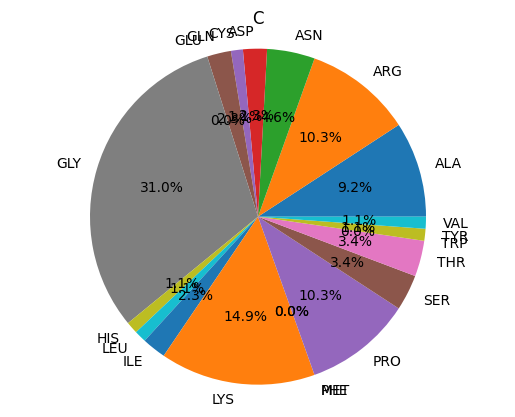

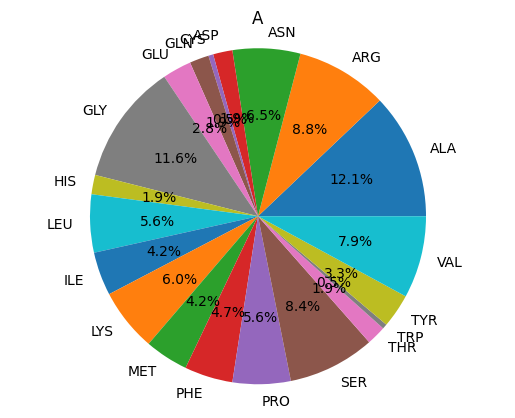

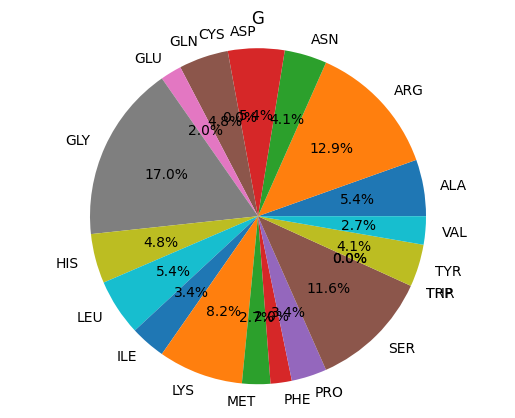

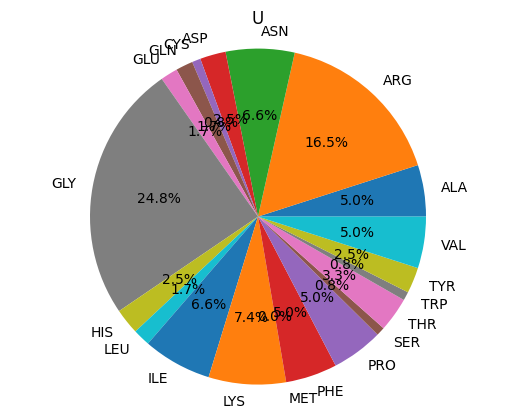

In [120]:
def plotNucleotideFreq(frequency_df, img_dir = 'db-aminoacids-frequency'):
  for indices, row in frequency_df.iterrows():
    fig1, ax1 = plt.subplots()
    plt.title(row['Nucleotide'])
    ax1.pie([
            row[aminoacids[0]],
            row[aminoacids[1]],
            row[aminoacids[2]],
            row[aminoacids[3]],
            row[aminoacids[4]],
            row[aminoacids[5]],
            row[aminoacids[6]],
            row[aminoacids[7]],
            row[aminoacids[8]],
            row[aminoacids[9]],
            row[aminoacids[10]],
            row[aminoacids[11]],
            row[aminoacids[12]],
            row[aminoacids[13]],
            row[aminoacids[14]],
            row[aminoacids[15]],
            row[aminoacids[16]],
            row[aminoacids[17]],
            row[aminoacids[18]],
            row[aminoacids[19]]
          ],
          labels=aminoacids,
          autopct='%1.1f%%')

    ax1.axis('equal')
    # plt.show()
        
    plt.savefig(f"imgs/general/{img_dir}/{row['Nucleotide']}.png", bbox_inches='tight')

plotNucleotideFreq(frequency_df)

# Alphafold

In [121]:
def getChainIdsAlpha(lines):
  chainIds = []
  for l in lines:
    lineInfos = l.split()
    if lineInfos[6] not in chainIds:
      chainIds.append(lineInfos[6])

  return chainIds

def getProteinChainAlpha(chainId, lines):
  atoms = {}
  for l in lines:
    lineInfos = l.split()
    if lineInfos[6] == chainId and lineInfos[3] == 'CA':
      resSeq = int(lineInfos[8])
      x = float(lineInfos[10])
      y = float(lineInfos[11])
      z = float(lineInfos[12])
      atoms[resSeq] = {
          'name': lineInfos[5],
          'position': (x, y, z),
      }
  return atoms

def getRNAChainAlpha(chainId, lines):
  atoms = {}
  nucleotides = ['A', 'U', 'C', 'G']
  for l in lines:
    lineInfos = l.split()
    if lineInfos[6] == chainId and lineInfos[5] in nucleotides:
      resSeq = int(lineInfos[8])
      x = float(lineInfos[10])
      y = float(lineInfos[11])
      z = float(lineInfos[12])
      atoms[resSeq] = {
          'name': lineInfos[5],
          'position': (x, y, z),
      }
  return atoms

def getProteinAminoacidsAlpha(chainId, lines):
  atoms = {}
  for l in lines:
    lineInfos = l.split()
    if lineInfos[6] == chainId and lineInfos[3] == 'CA':
      resSeq = int(lineInfos[8])
      atoms[resSeq] = lineInfos[5]
  return atoms

def getRNANucleotidesAlpha(chainId, lines):
  atoms = {}
  nucleotides = ['A', 'U', 'C', 'G']
  for l in lines:
    lineInfos = l.split()
    if lineInfos[6] == chainId and lineInfos[5] in nucleotides:
      resSeq = int(lineInfos[8])
      atoms[resSeq] = lineInfos[5]
  return atoms

In [122]:
def readAlphaFiles():
  proteinChains = {}
  RNAChains = {}
    
  for dir_name in os.listdir(ALPHA_DATABASE_DIR):
    if dir_name != '.DS_Store' and dir_name != 'cleaner.py':
        aux = 0
        for filename in os.listdir(os.path.join(ALPHA_DATABASE_DIR, dir_name)):
            with open(os.path.join(ALPHA_DATABASE_DIR, dir_name, filename), 'r') as fr:
              lines = fr.readlines()
              structCode = f'{filename[5:9]}-{aux}'
              aux += 1
              chainIDs = getChainIdsAlpha(lines)
              if len(chainIDs) == 2:
                for chainID in chainIDs:
                  proteinChain = getProteinChainAlpha(chainID, lines)
                  if proteinChain != {}:
                    proteinChains[structCode] = proteinChain
                      
                  RNAChain = getRNAChainAlpha(chainID, lines)
                  if RNAChain != {}:
                    RNAChains[structCode] = RNAChain

  return proteinChains, RNAChains

proteinChainsAlpha, RNAChainsAlpha = readAlphaFiles()

In [123]:
interactionsAlpha = {}
all_interactions = []

for key, values in proteinChainsAlpha.items():
  d = distMap(proteinChainsAlpha[key], RNAChainsAlpha[key])
  interactionsAlpha[key] = d

  for val in d:
    all_interactions.append(val)

In [124]:
aminoacid_interaction_stats = {}

for val in all_interactions:
  aminoacid_interaction_stats[val['from']] = getList(val['from'])

frequency = getAminoacidFreq(aminoacid_interaction_stats)
frequency_df = mountFrequencyDf(frequency)

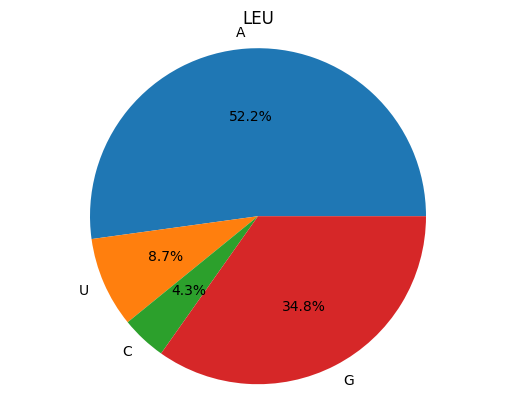

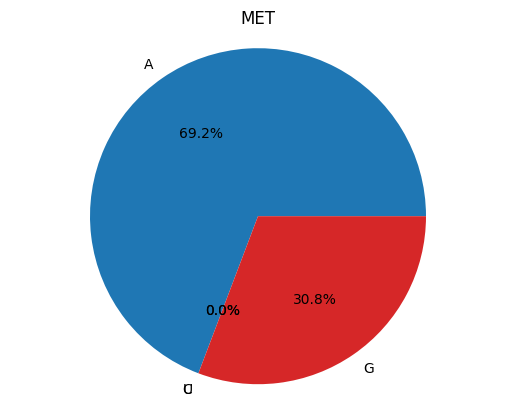

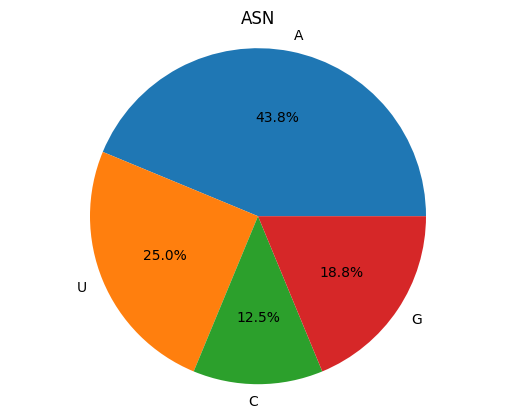

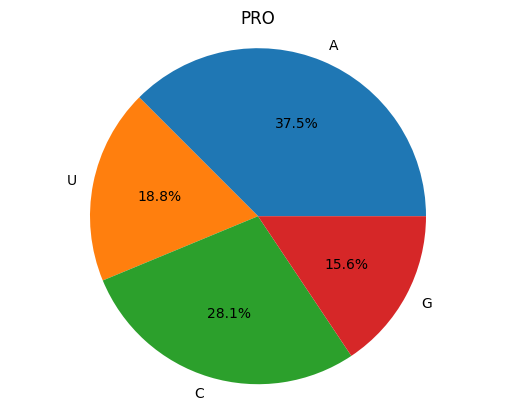

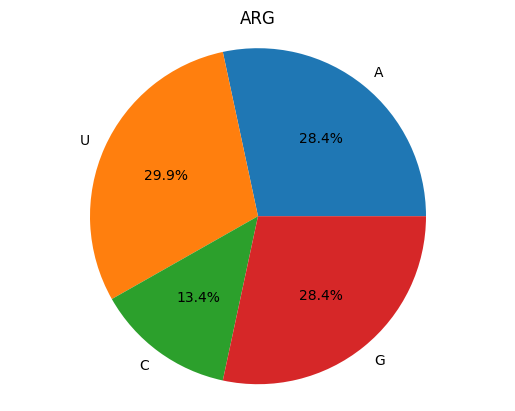

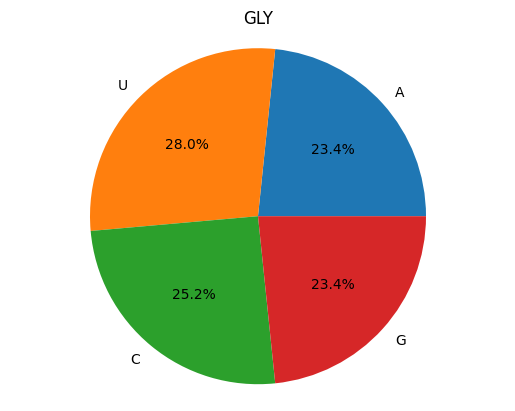

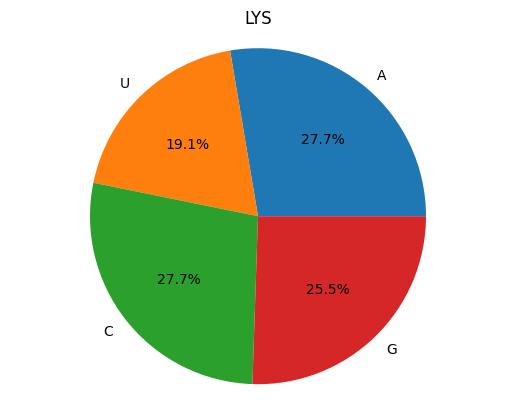

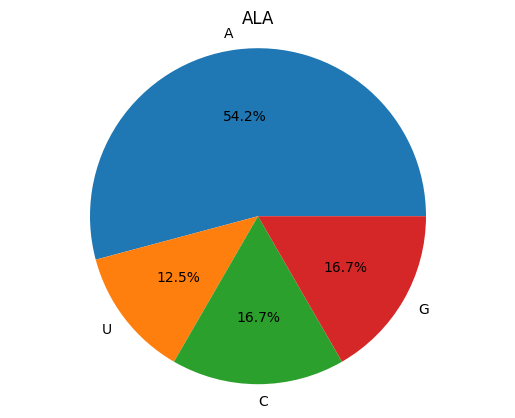

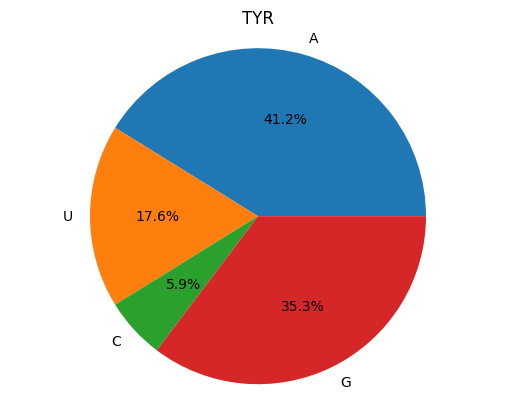

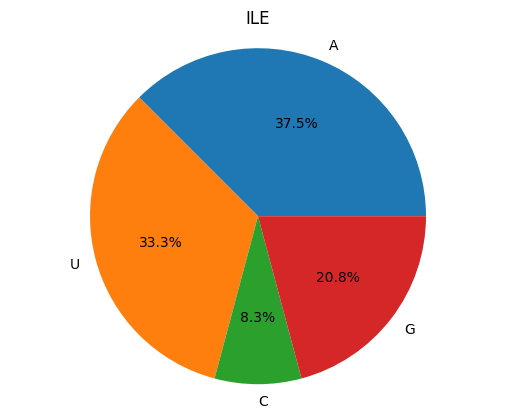

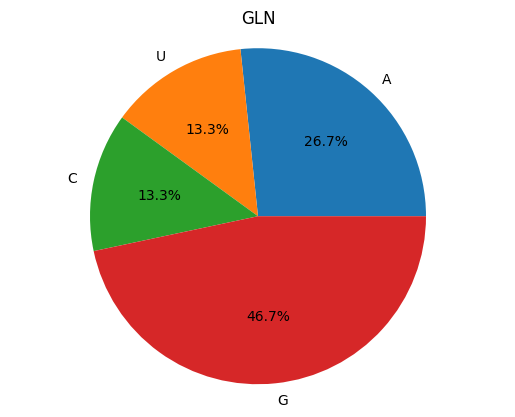

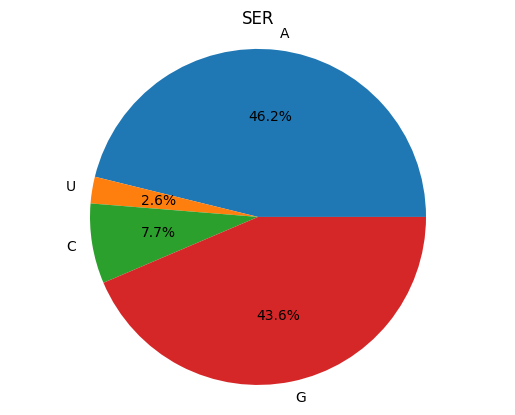

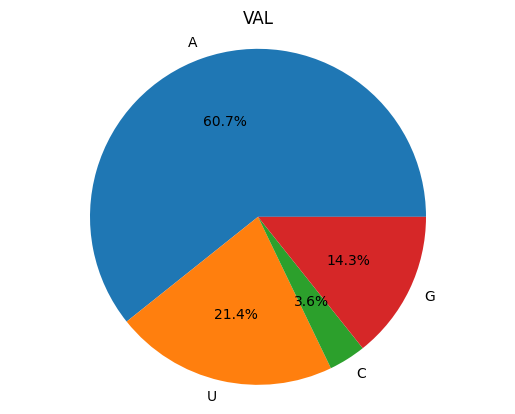

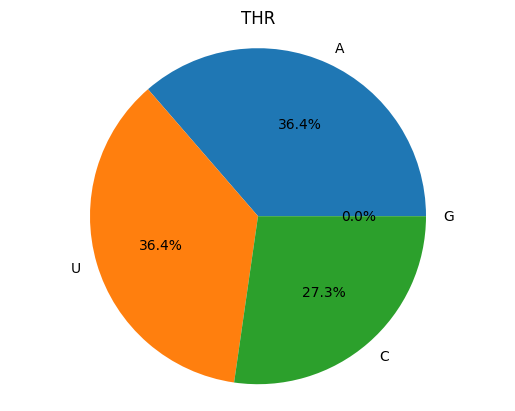

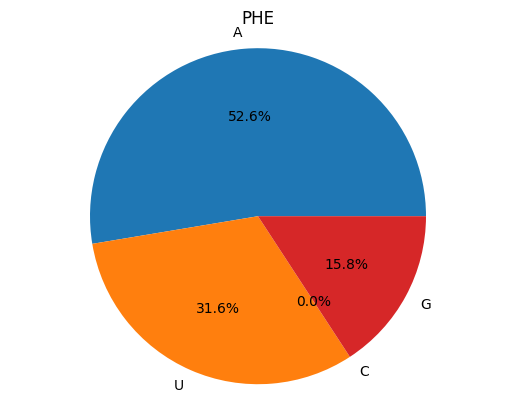

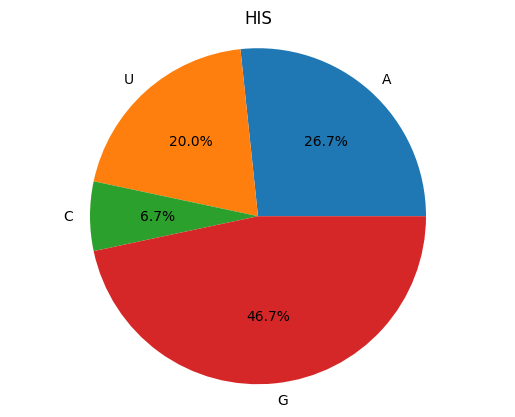

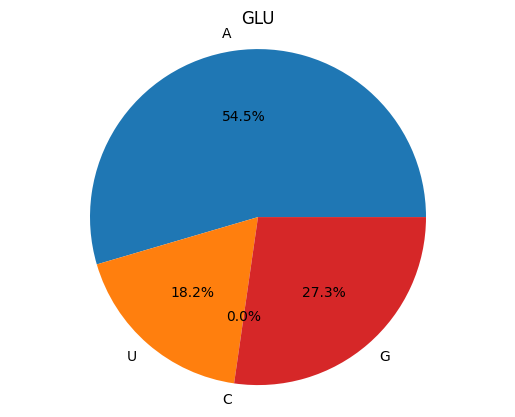

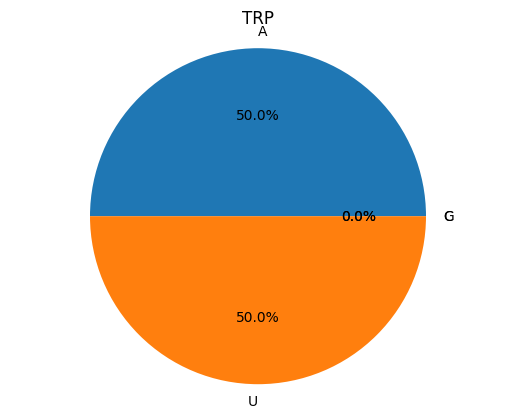

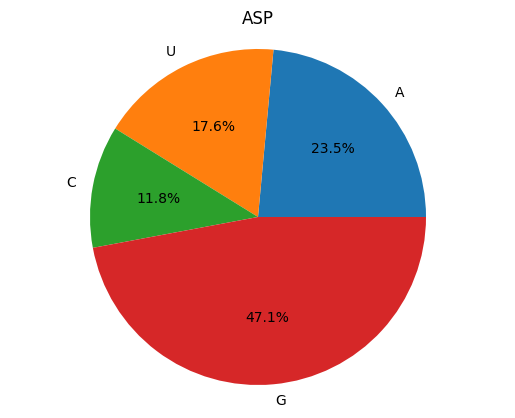

In [125]:
plotNucleotideFrequency(frequency_df, 'db-alpha-nucleotides-frequency')

In [126]:
nucleotides_interaction_stats = {}

for val in all_interactions:
  nucleotides_interaction_stats[val['to']] = getListNumclAmin(val['to'])

frequencyNumclAmin = getNucleotideFreq(nucleotides_interaction_stats)
frequency_df = mountNucleotideFrequencyDf(frequencyNumclAmin)

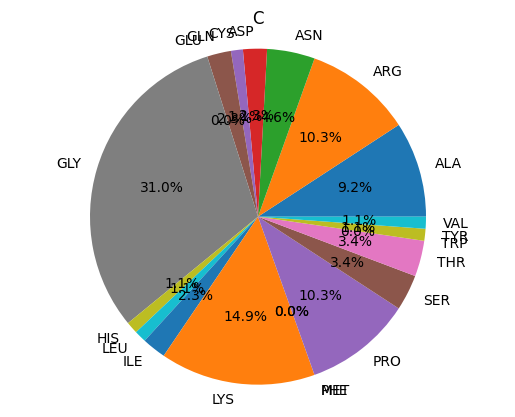

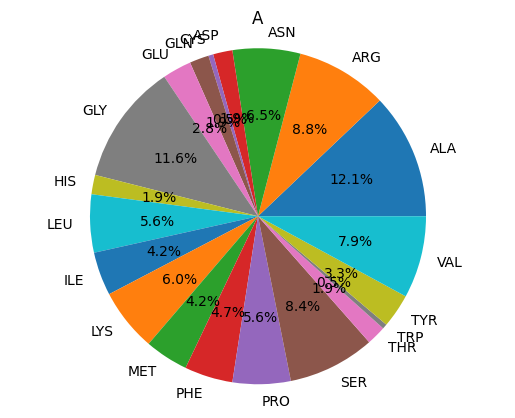

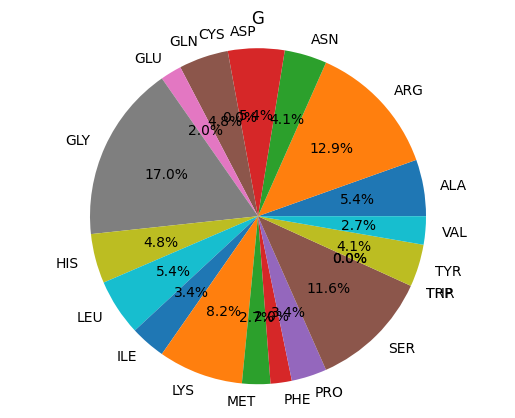

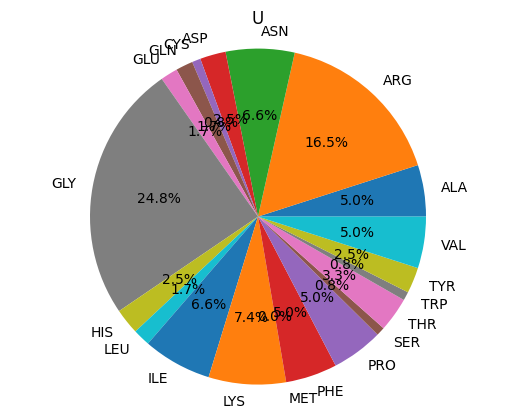

In [127]:
plotNucleotideFreq(frequency_df, 'db-alpha-aminoacids-frequency')

In [128]:
interactionsAlpha['1a4t-0']

[{'from': 'ALA', 'to': 'C', 'dist': 4.622969283912667},
 {'from': 'ARG', 'to': 'C', 'dist': 4.673295732135941}]

In [129]:
interactionsPDB['1a4t']

[{'from': 'ALA', 'to': 'C', 'dist': 4.178533115819474},
 {'from': 'ARG', 'to': 'C', 'dist': 4.481754344004142},
 {'from': 'ALA', 'to': 'C', 'dist': 4.004107266295447},
 {'from': 'ILE', 'to': 'C', 'dist': 4.439357611186556}]

In [130]:
for aminoacid, interactions in interactionsAlpha.items():
    aminoacid_name = aminoacid.split('-')
    print(aminoacid_name[0])

2l5d
2l5d
2l5d
2l5d
2l5d
6h5q
6h5q
6h5q
6h5q
6h5q
6ajk
6ajk
6ajk
6ajk
6ajk
3tup
3tup
3tup
3tup
3tup
5uzz
5uzz
5uzz
5uzz
5uzz
6mcf
6mcf
6mcf
6mcf
6mcf
8bf8
8bf8
8bf8
8bf8
8bf8
7x34
7x34
7x34
7x34
7x34
2fy1
2fy1
2fy1
2fy1
2fy1
2mjh
2mjh
2mjh
2mjh
2mjh
484d
484d
484d
484d
484d
1mnb
1mnb
1mnb
1mnb
1mnb
2lup
2lup
2lup
2lup
2lup
7zpi
7zpi
7zpi
7zpi
7zpi
5j2w
5j2w
5j2w
5j2w
5j2w
2kx5
2kx5
2kx5
2kx5
2kx5
1hji
1hji
1hji
1hji
1hji
7oi3
7oi3
7oi3
7oi3
7oi3
6tph
6tph
6tph
6tph
6tph
1r2w
1r2w
1r2w
1r2w
1r2w
4b8t
4b8t
4b8t
4b8t
4b8t
3qrr
3qrr
3qrr
3qrr
3qrr
3moj
3moj
3moj
3moj
3moj
2mqo
2mqo
2mqo
2mqo
2mqo
6r9p
6r9p
6r9p
6r9p
6r9p
1t4l
1t4l
1t4l
1t4l
1t4l
1t2r
1t2r
1t2r
1t2r
1t2r
2lbs
2lbs
2lbs
2lbs
2lbs
1r2x
1r2x
1r2x
1r2x
1r2x
6r9m
6r9m
6r9m
6r9m
6r9m
6r9j
6r9j
6r9j
6r9j
6r9j
7q4l
7q4l
7q4l
7q4l
7q4l
6m7d
6m7d
6m7d
6m7d
6m7d
2rs2
2rs2
2rs2
2rs2
2rs2
2mtv
2mtv
2mtv
2mtv
2mtv
6r9q
6r9q
6r9q
6r9q
6r9q
5mpg
5mpg
5mpg
5mpg
5mpg
6so9
6so9
6so9
6so9
6so9
1i9f
1i9f
1i9f
1i9f
1i9f
8fti
8fti
8fti
8fti
8fti
